In [1]:
!pip install seaborn
!pip install sklearn
!pip install numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [3]:
dataset=pd.read_csv('../data/Attrition.csv')

### DataSet Introduction and Exploration
### Here we are exploring the dataset to find the kind of data in dataset ,measure the quality of data 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   object
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   object
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [5]:
data_description=dataset.describe(include="all")

In [6]:
display(data_description[[ "EmployeeNumber", "Over18"]])

,EmployeeNumber,Over18
count,1470.000000,1470
unique,NaN,1
top,NaN,Y
freq,NaN,1470
mean,1024.865306,NaN
std,602.024335,NaN
min,1.000000,NaN
25%,491.250000,NaN
50%,1020.500000,NaN
75%,1555.750000,NaN


In [7]:
print(dataset.Department.unique())
print(dataset.BusinessTravel.unique())
print(dataset.EducationField.unique())
print(dataset.Gender.unique())
print(dataset.JobRole.unique())
print(dataset.MaritalStatus.unique())
print(dataset.Attrition.unique())

['Sales' 'Research & Development' 'Human Resources']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Yes' 'No']


In [8]:
dataset.shape 

(1470, 33)

In [9]:
dataset.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
dataset.dtypes

Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome            object
Education                   object
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                  object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome               object
MonthlyRate                 object
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

#### After Analysing the Dataset , categoizing the columns =>
#### Categorical Data Columns Are: Department,MaritalStatus,Gender,JobRole,EducationField,Business Travel,JobSatisfication,Attrition,Performance Rating,Education,RelationshipSatisfication


#### checking the distribution and



#### Now we are visualizing the attrition against columns to see what factors are affecting attrition

In [11]:
attr_department = dataset.groupby(['Attrition', 'Department']).size().reset_index().pivot(columns = 'Attrition', index = 'Department', values = 0)
print('checking the attrition against gender')
attr_gender = dataset.groupby(['Attrition', 'Gender']).size().reset_index().pivot(columns = 'Attrition', index = 'Gender', values = 0)
attr_educfield = dataset.groupby(['Attrition', 'EducationField']).size().reset_index().pivot(columns = 'Attrition', index = 'EducationField', values = 0)
attr_maritalstat=dataset.groupby(['Attrition', 'MaritalStatus']).size().reset_index().pivot(columns = 'Attrition', index = 'MaritalStatus', values = 0)
attr_distance_home=dataset.groupby(['Attrition', 'DistanceFromHome']).size().reset_index().pivot(columns = 'Attrition', index = 'DistanceFromHome', values = 0)
attr_jobsatis=dataset.groupby(['Attrition', 'JobSatisfaction']).size().reset_index().pivot(columns = 'Attrition', index = 'JobSatisfaction', values = 0)
attr_jobrole=dataset.groupby(['Attrition', 'JobRole']).size().reset_index().pivot(columns = 'Attrition', index = 'JobRole', values = 0)
attr_Bustr = dataset.groupby(['Attrition', 'BusinessTravel']).size().reset_index().pivot(columns = 'Attrition', index = 'BusinessTravel', values = 0)
attr_salaryhike = dataset.groupby(['Attrition', 'PercentSalaryHike']).size().reset_index().pivot(columns = 'Attrition', index = 'PercentSalaryHike', values = 0)
attr_environsats=dataset.groupby(['Attrition', 'EnvironmentSatisfaction']).size().reset_index().pivot(columns = 'Attrition', index = 'EnvironmentSatisfaction', values = 0)
attr_age = dataset.groupby(['Attrition', 'Age']).size().reset_index().pivot(columns = 'Attrition', index = 'Age', values = 0)



checking the attrition against gender


Attrition against gender
Attrition against Department


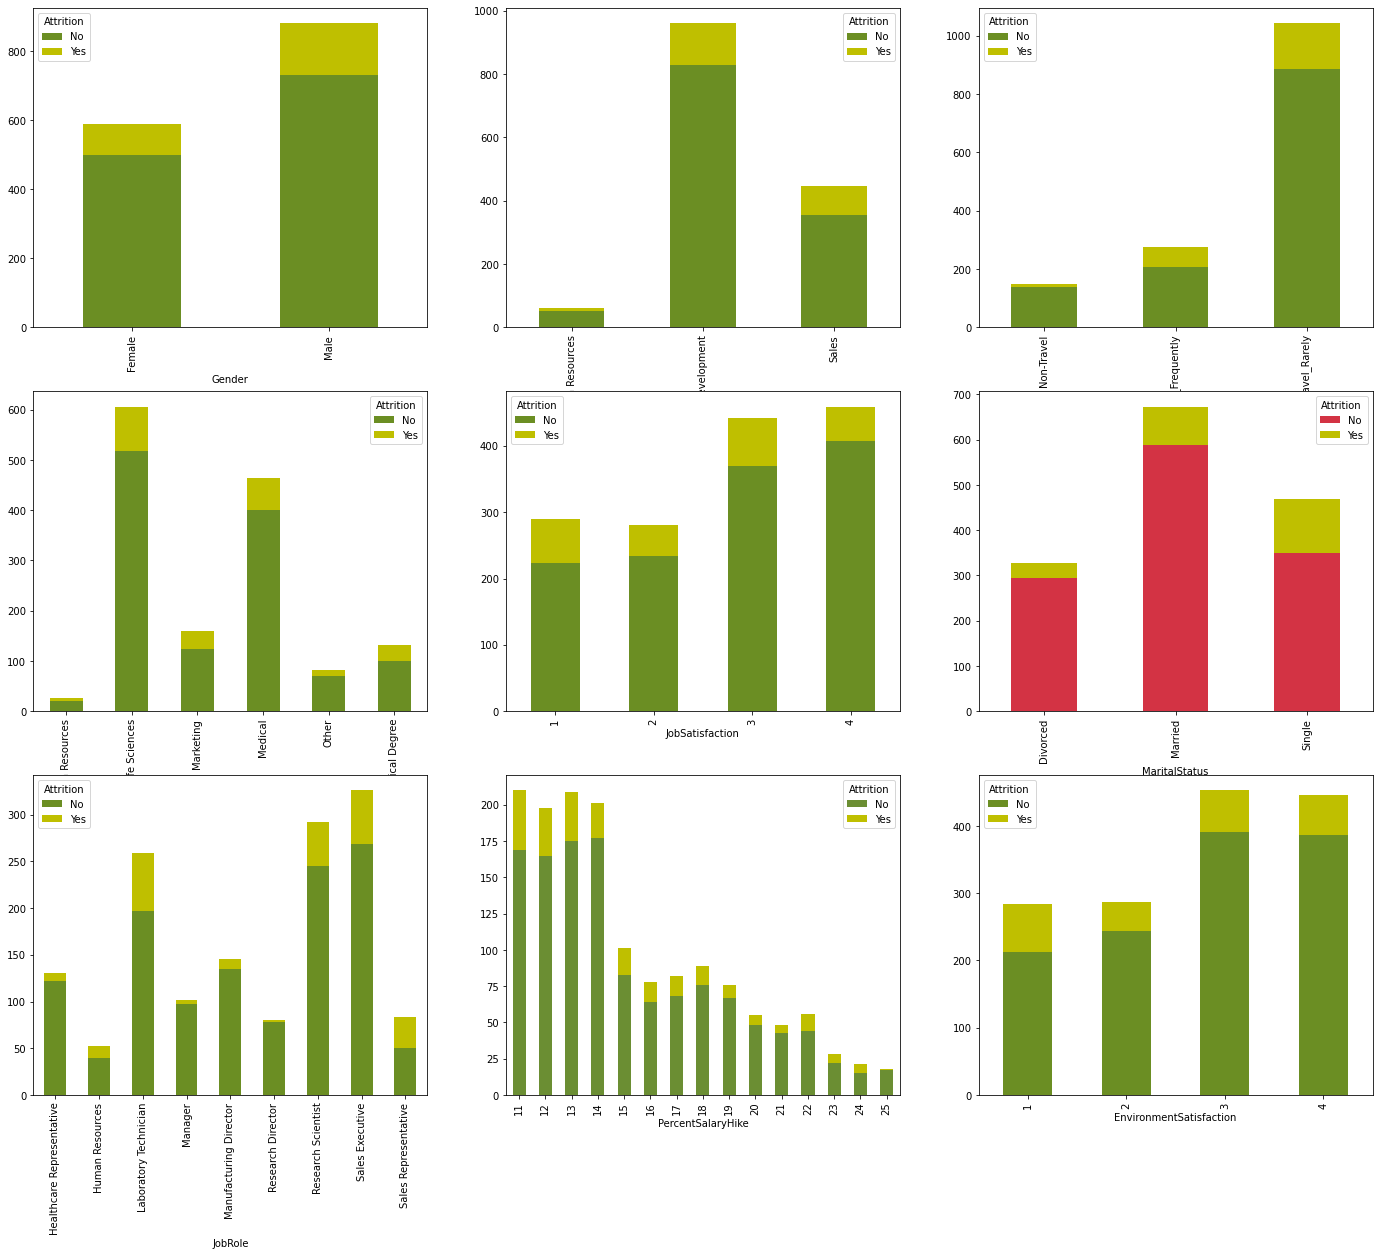

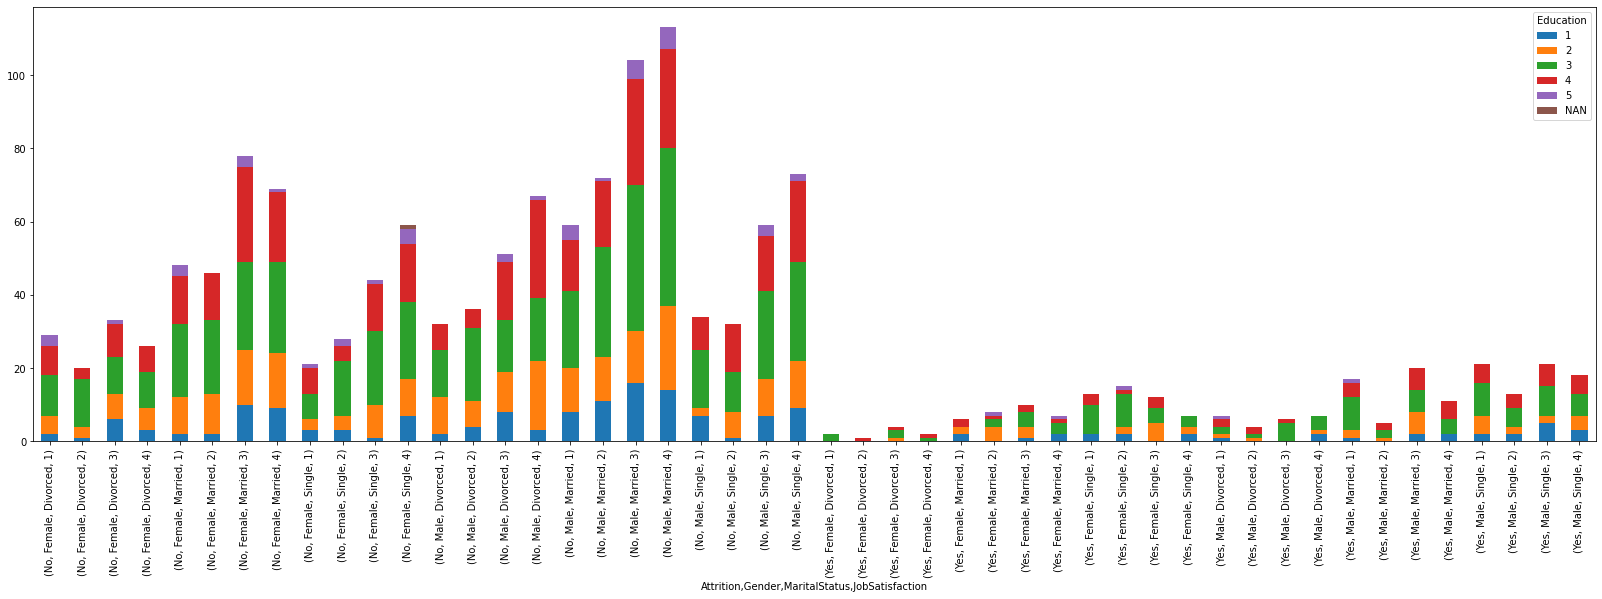

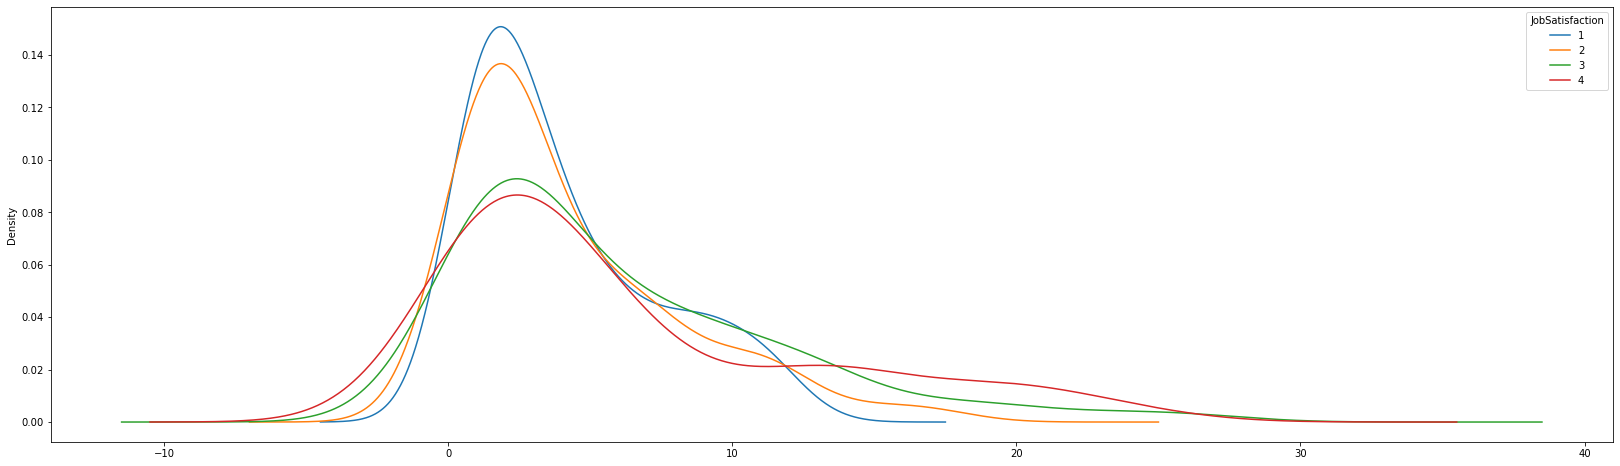

In [12]:
fig, ax = plt.subplots(3, 3, figsize = (24, 20))
# fig.subplots_adjust(wspace=0)
print('Attrition against gender')
attr_gender.plot(kind = 'bar', stacked = True, color = ['#6B8E23','y'], ax = ax[0,0])
print('Attrition against Department')

attr_department.plot(kind = 'bar', stacked = True, color = ['#6B8E23','y'], ax = ax[0,1])
attr_Bustr.plot(kind = 'bar', stacked = True, color = ['#6B8E23','y'], ax = ax[0,2])
attr_educfield.plot(kind = 'bar', stacked = True, color = ['#6B8E23','y'], ax = ax[1,0])
attr_jobsatis.plot(kind = 'bar', stacked = True, color = ['#6B8E23','y'], ax = ax[1,1])
attr_maritalstat.plot(kind = 'bar', stacked = True, color = ['#D33344','y'], ax = ax[1,2])
attr_jobrole.plot(kind = 'bar', stacked = True, color = ['#6B8E23','y'], ax = ax[2,0])
attr_salaryhike.plot(kind = 'bar', stacked = True, color = ['#6B8E33','y'], ax = ax[2,1])
attr_environsats.plot(kind = 'bar', stacked = True, color = ['#6B8E23','y'], ax = ax[2,2])
fig1,ax2=plt.subplots(figsize = (28, 8))
dataset.groupby(['Attrition','Gender','MaritalStatus','JobSatisfaction','Education']).size().unstack().plot(kind='bar',stacked=True,ax=ax2)
fig2,ax3=plt.subplots(figsize = (28, 8))
dataset.groupby(['Attrition','Age','JobSatisfaction']).size().unstack().plot(kind='kde',stacked=True,ax=ax3)

# dataset.plot(kind = 'scatter', x=dataset['Attrition'], y=dataset['EnvironmentSatisfaction'] stacked = True, color = ['#6B8E23','y'], ax = ax[2,2])
# attr_salaryhike.plot(kind = 'bar', stacked = True, color = ['#6B8E23','y'], ax = ax[2,1])

# df_plot_Inv.plot(kind = 'bar', stacked = True, color = ['#6B8E23','y'], ax = ax[2,1])
# df_plot_Bln.plot(kind = 'bar', stacked = True, color = ['#6B8E23','y'], ax = ax[2,2])
#df_plot_Pro.plot(kind = 'bar', stacked = True, color = ['#45A7A3','y'], ax = ax[3,0])
plt.show()

### Looking at the graphs showing that attrition against age is more for youngest oppose to oldest peoples, also the 


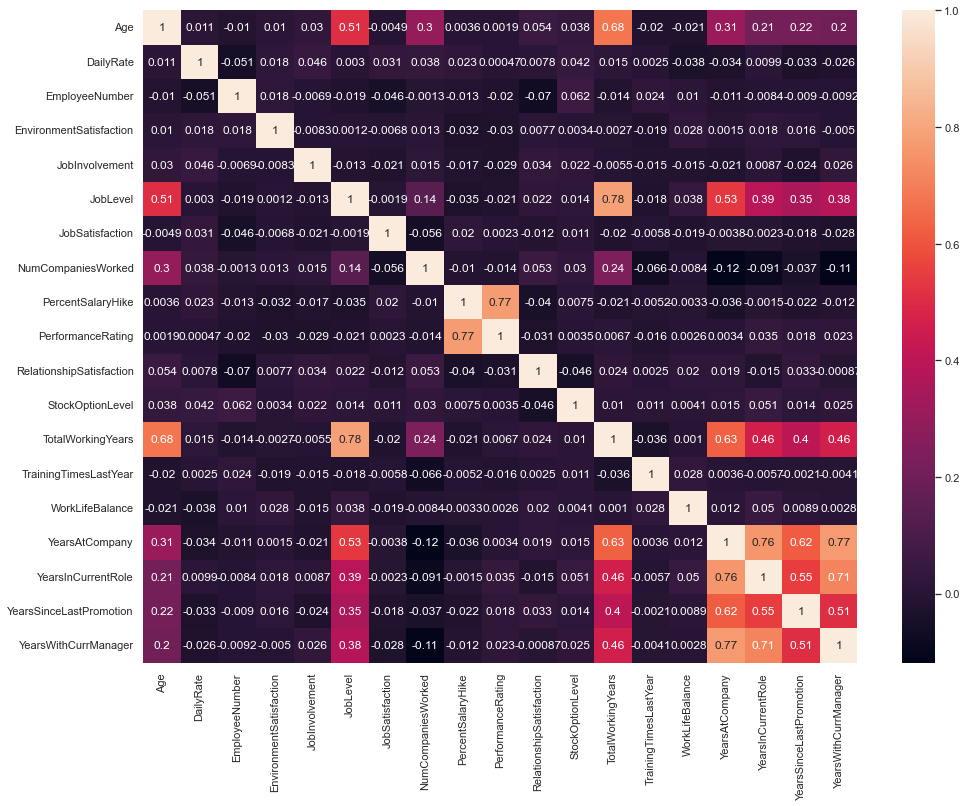

In [13]:
# checking linear correlation of data
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(dataset.corr(method="pearson"), annot=True)
plt.show()

#### checking missing values

In [14]:
dataset.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int